In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
%matplotlib inline

In [3]:
def download_files():
    """
    Este metodo descarga los archivos de imagenes sino existen
    """
    path_tar = os.path.join("data",'faces.zip')
    if not isfile(path_tar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            path_tar)
    dest_path =  "data/faces"
    with zipfile.ZipFile(path_tar) as tar:
        tar.extractall(dest_path)
        tar.close()
download_files()

In [4]:
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

d_name = 'data/faces/rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)

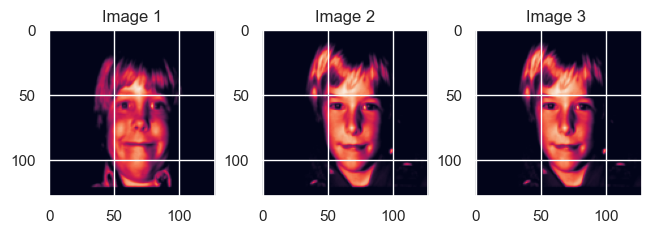

In [7]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()
plot_3_images(X,1, 2 , 3)

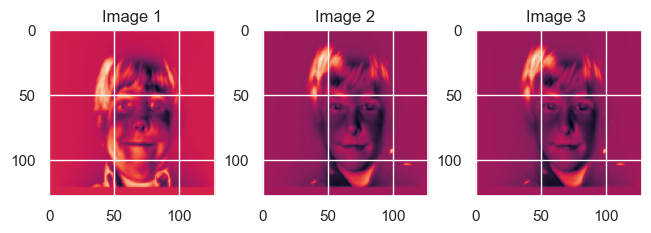

In [8]:
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_3_images(X_center,1, 2 ,3)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

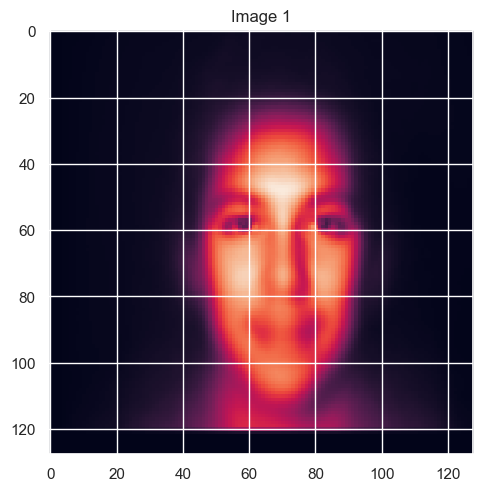

In [9]:
plot_1_images(X_mean)

In [32]:
X.shape

(818, 16384)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
# images x dim
X_reduced = pca.fit_transform(X_center)

In [14]:
eigen_values = pca.explained_variance_
eigen_faces = pca.components_

In [15]:
eigen_values

array([7.50524248e+06, 2.05413371e+06, 1.74409855e+06, 9.20128570e+05,
       8.39328208e+05, 7.67970060e+05, 6.22227354e+05, 4.58478364e+05,
       3.34837916e+05, 3.16327188e+05, 2.31868330e+05, 2.27921865e+05,
       2.00677812e+05, 1.85732809e+05, 1.78906141e+05, 1.71214127e+05,
       1.57617961e+05, 1.40352238e+05, 1.25942434e+05, 1.21068052e+05,
       1.19705446e+05, 1.13470967e+05, 1.05506873e+05, 1.03750817e+05,
       1.00114142e+05, 9.24985096e+04, 8.82324015e+04, 8.25002301e+04,
       7.68881183e+04, 7.60903315e+04, 7.09139735e+04, 6.78751159e+04,
       6.67247761e+04, 6.25473902e+04, 6.14667718e+04, 5.91610786e+04,
       5.81867521e+04, 5.67908890e+04, 5.30784499e+04, 5.15662670e+04,
       5.10588079e+04, 4.88843892e+04, 4.70381088e+04, 4.46473800e+04,
       4.39437674e+04, 4.12741694e+04, 4.06683669e+04, 3.97575131e+04,
       3.90477017e+04, 3.74066440e+04, 3.72242403e+04, 3.59662816e+04,
       3.46726837e+04, 3.42671112e+04, 3.31784872e+04, 3.21895123e+04,
      

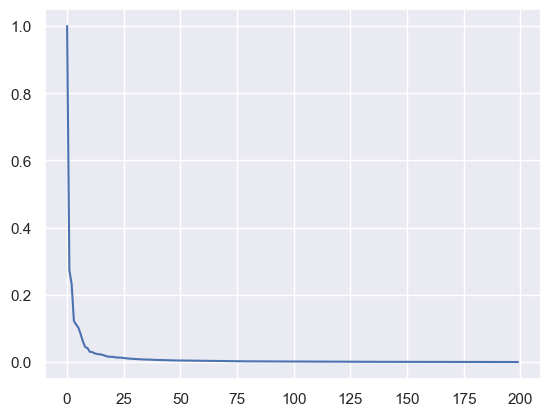

In [16]:
# Se puede ver como los primeras componentes contienen mas informacion
plt.plot(range(0,200), eigen_values/eigen_values[0])

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

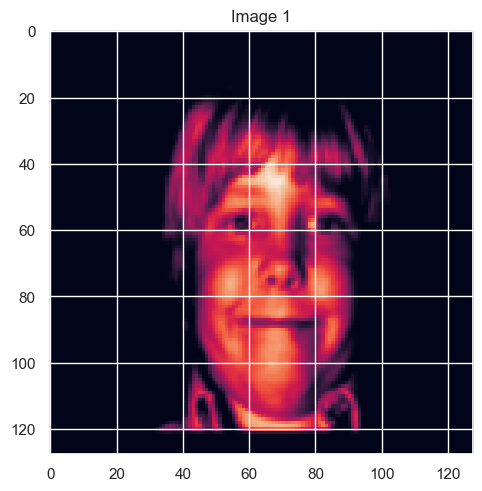

In [17]:
plot_1_images(X[1])

## reconstruir imagen

In [18]:
print('Componentes', X_reduced.shape)
print('Eigenvectores', eigen_faces.shape)
face_1 = np.dot(X_reduced[1].reshape(1,-1),eigen_faces)
print(face_1.sum(axis=0))

Componentes (818, 200)
Eigenvectores (200, 16384)
[-8.77314976e-12  3.00796580e-12  1.77859958e-02 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [19]:
eigen_faces[0].shape
face_c1 = np.dot(X_reduced[1].reshape(1,-1),eigen_faces)
face_c1.shape

(1, 16384)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

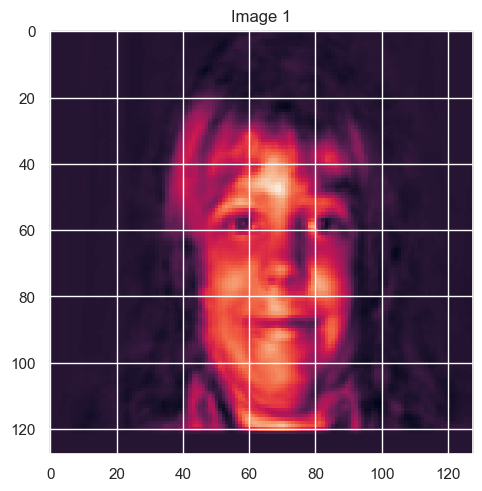

In [20]:
plot_1_images(X_mean + face_1.sum(axis=0) )

(None, <Axes: title={'center': 'Con 200 eigenfaces'}>)

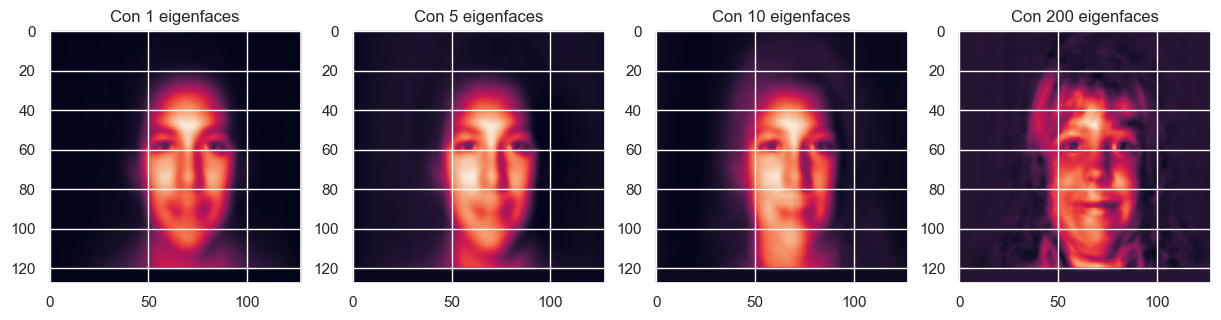

In [21]:
face_1 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:5],
                                      eigen_faces[:5,:]),
                               axis=0)


face_10 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)

face_200 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:200],
                                     eigen_faces[:200,:]),
                              axis=0)
fig, ax = plt.subplots(1,4,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_200,ax=ax[3],label="Con 200 eigenfaces")

las componentes que explican el 90% de la varianza
y por último con el numero de componentes que tiene el 99% de la varianza.

In [22]:
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

In [23]:
n_components_90 = np.where(explained_variance_ratio_cumulative >= 0.90)[0][0] + 1

In [30]:
n_components_95 = np.where(explained_variance_ratio_cumulative >= 0.95)[0][0] + 1

In [25]:
print("componentes que explican el 90%: ",n_components_90)

componentes que explican el 90%:  63


In [31]:
print("componentes que explican el 95%: ",n_components_95)

componentes que explican el 95%:  132
